In [ ]:
### All imports here
!pip install git+https://github.com/qubvel/segmentation_models tensorflow torchmetrics
!pip install torchmetrics[audio]
!pip install pyclarity

from google.colab import drive

import IPython
from IPython.display import Audio

import json

from keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, UpSampling2D
from keras.models import Model

import librosa

import matplotlib.pyplot as plt

import numpy as np
from numpy import concatenate

import os

import pandas

from scipy import stats
import segmentation_models as sm
from segmentation_models import Unet
import shutil
from sklearn.model_selection import train_test_split
import soundfile as sf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend
import torch
import torchaudio

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-_n23twzn
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models /tmp/pip-req-build-_n23twzn
  Resolved https://github.com/qubvel/segmentation_models to commit 5d24bbfb28af6134e25e2c0b79e7727f6c0491d0
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.3 MB/s eta 0:00:00
   ━━━

Segmentation Models: using `keras` framework.


In [ ]:
# creating folder for all clean speech
!mkdir clean_speech

In [ ]:
### First, choose datasets we want
# english speech collected from audiobooks
#!wget http://openslr.elda.org/resources/12/dev-clean.tar.gz

In [ ]:
#!wget http://openslr.elda.org/resources/12/test-clean.tar.gz

In [ ]:
#!wget http://openslr.elda.org/resources/12/train-clean-360.tar.gz

In [ ]:
#!wget http://openslr.elda.org/resources/12/dev-other.tar.gz

In [ ]:
#!wget http://openslr.elda.org/resources/12/test-other.tar.gz

In [ ]:
#!wget http://openslr.elda.org/resources/12/train-other-500.tar.gz

In [ ]:
# extracting LibriSpeech
#!tar -xvf "/content/dev-clean.tar.gz"

In [ ]:
#!tar -xvf "/content/test-clean.tar.gz"

In [ ]:
#!tar -xvf "/content/train-clean-360.tar.gz"

In [ ]:
#!tar -xvf "/content/dev-other.tar.gz"

In [ ]:
#!tar -xvf "/content/test-other.tar.gz"

In [ ]:
#!tar -xvf "/content/train-other-500.tar.gz"

In [ ]:
# put all clean speech files in clean_speech folder
#for root, dir, files in os.walk("/content/LibriSpeech/dev-clean"):
  #for file in files:
    #if file.endswith(".flac"):
      #path_file = os.path.join(root, file)
      #shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# put all clean speech files in clean_speech folder
#for root, dir, files in os.walk("/content/LibriSpeech/test-clean"):
  #for file in files:
    #if file.endswith(".flac"):
      #path_file = os.path.join(root, file)
      #shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
#for root, dir, files in os.walk("/content/LibriSpeech/train-clean-360"):
  #for file in files:
    #if file.endswith(".flac"):
      #path_file = os.path.join(root, file)
      #shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
#for root, dir, files in os.walk("/content/LibriSpeech/dev-other"):
  #for file in files:
    #if file.endswith(".flac"):
      #path_file = os.path.join(root, file)
      #shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
#for root, dir, files in os.walk("/content/LibriSpeech/test-other"):
  #for file in files:
    #if file.endswith(".flac"):
      #path_file = os.path.join(root, file)
      #shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
#for root, dir, files in os.walk("/content/LibriSpeech/train-other-500"):
  #for file in files:
    #if file.endswith(".flac"):
      #path_file = os.path.join(root, file)
      #shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# now delete the original LibriSpeech dataset
#!rm -r /content/LibriSpeech

In [ ]:
# load the dataset from google drive
drive.mount("/content/drive")
#drive_file_path_11 = "/content/drive/MyDrive/cv-corpus-11.0-delta-2022-09-21-en.tar.gz"

Mounted at /content/drive


In [ ]:
# unzip & extract
!tar -xvf "/content/drive/MyDrive/MCV10.tar"
!tar -xvf "/content/drive/MyDrive/MCV11.tar"
!tar -xvf "/content/drive/MyDrive/MCV12.tar"
!tar -xvf "/content/drive/MyDrive/MCV13.tar"
!tar -xvf "/content/drive/MyDrive/MCV14_new.tar"
!tar -xvf "/content/drive/MyDrive/MCV15.tar"
!tar -xvf "/content/drive/MyDrive/MCV16.tar"
!tar -xvf "/content/drive/MyDrive/MCV17.tar"
!tar -xvf "/content/drive/MyDrive/MCV18.tar"
!tar -xvf "/content/drive/MyDrive/MCV19.tar"
!tar -xvf "/content/drive/MyDrive/MCV20.tar"
!tar -xvf "/content/drive/MyDrive/MCV21.tar"
!tar -xvf "/content/drive/MyDrive/MCV22_new.tar"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-10.0-delta-2022-07-04-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-11.0-delta-2022-09-21-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-12.0-delta-2022-12-07-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-13.0-delta-2023-03-09-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-14.0-delta-2023-06-23-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-15.0-delta-2023-09-08-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-16.1-delta-2023-12-06-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-17.0-delta-2024-03-15-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-18.0-delta-2024-06-14-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-19.0-delta-2024-09-13-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-20.0-delta-2024-12-06-en.tar.gz"
#!tar -xvf "/content/drive/MyDrive/cv-corpus-21.0-delta-2025-03-14-en.tar.gz"

Streaming output truncated to the last 5000 lines.
MCV22_new/common_voice_en_43004148.mp3
MCV22_new/common_voice_en_43004156.mp3
MCV22_new/common_voice_en_43004157.mp3
MCV22_new/common_voice_en_43004160.mp3
MCV22_new/common_voice_en_43004182.mp3
MCV22_new/common_voice_en_43004194.mp3
MCV22_new/common_voice_en_43004224.mp3
MCV22_new/common_voice_en_43004235.mp3
MCV22_new/common_voice_en_43004244.mp3
MCV22_new/common_voice_en_43004254.mp3
MCV22_new/common_voice_en_43004255.mp3
MCV22_new/common_voice_en_43004256.mp3
MCV22_new/common_voice_en_43004274.mp3
MCV22_new/common_voice_en_43004278.mp3
MCV22_new/common_voice_en_43004327.mp3
MCV22_new/common_voice_en_43011662.mp3
MCV22_new/common_voice_en_43011664.mp3
MCV22_new/common_voice_en_43019916.mp3
MCV22_new/common_voice_en_43019919.mp3
MCV22_new/common_voice_en_43019920.mp3
MCV22_new/common_voice_en_43019946.mp3
MCV22_new/common_voice_en_43020620.mp3
MCV22_new/common_voice_en_43020623.mp3
MCV22_new/common_voice_en_43023581.mp3
MCV22_new/com

In [ ]:
# 10: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-10.0-delta-2022-07-04/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 11: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-11.0-delta-2022-09-21/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 12: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-12.0-delta-2022-12-07/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 13: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-13.0-delta-2023-03-09/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 14: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-14.0-delta-2023-06-23/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 15: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-15.0-delta-2023-09-08/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 16: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-16.1-delta-2023-12-06/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 17: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-17.0-delta-2024-03-15/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 18: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-18.0-delta-2024-06-14/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 19: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-19.0-delta-2024-09-13/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 20: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-20.0-delta-2024-12-06/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
# 21: move data to the clean_speech folder
for root, dir, files in os.walk("/content/cv-corpus-21.0-delta-2025-03-14/en/clips"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
### for sorted audio files ONLY!
for root, dir, files in os.walk("/content/MCV10"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV11"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV12"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV13"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV14_new"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV15"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV16"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV17"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV18"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV19"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV20"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV21"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
for root, dir, files in os.walk("/content/MCV22_new"):
  for file in files:
    if file.endswith(".mp3"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/clean_speech")

In [ ]:
## remove the original (unzipped) directory
!rm -r /content/cv-corpus-10.0-delta-2022-07-04
!rm -r /content/cv-corpus-11.0-delta-2022-09-21
!rm -r /content/cv-corpus-12.0-delta-2022-12-07
!rm -r /content/cv-corpus-13.0-delta-2023-03-09
!rm -r /content/cv-corpus-14.0-delta-2023-06-23
!rm -r /content/cv-corpus-15.0-delta-2023-09-08
!rm -r /content/cv-corpus-16.1-delta-2023-12-06
!rm -r /content/cv-corpus-17.0-delta-2024-03-15
!rm -r /content/cv-corpus-18.0-delta-2024-06-14
!rm -r /content/cv-corpus-19.0-delta-2024-09-13
!rm -r /content/cv-corpus-20.0-delta-2024-12-06
!rm -r /content/cv-corpus-21.0-delta-2025-03-14

!rm -r /content/MCV10
!rm -r /content/MCV11
!rm -r /content/MCV12
!rm -r /content/MCV13
!rm -r /content/MCV14_new
!rm -r /content/MCV15
!rm -r /content/MCV16
!rm -r /content/MCV17
!rm -r /content/MCV18
!rm -r /content/MCV19
!rm -r /content/MCV20
!rm -r /content/MCV21
!rm -r /content/MCV22_new

rm: cannot remove '/content/cv-corpus-10.0-delta-2022-07-04': No such file or directory
rm: cannot remove '/content/cv-corpus-11.0-delta-2022-09-21': No such file or directory
rm: cannot remove '/content/cv-corpus-12.0-delta-2022-12-07': No such file or directory
rm: cannot remove '/content/cv-corpus-13.0-delta-2023-03-09': No such file or directory
rm: cannot remove '/content/cv-corpus-14.0-delta-2023-06-23': No such file or directory
rm: cannot remove '/content/cv-corpus-15.0-delta-2023-09-08': No such file or directory
rm: cannot remove '/content/cv-corpus-16.1-delta-2023-12-06': No such file or directory
rm: cannot remove '/content/cv-corpus-17.0-delta-2024-03-15': No such file or directory
rm: cannot remove '/content/cv-corpus-18.0-delta-2024-06-14': No such file or directory
rm: cannot remove '/content/cv-corpus-19.0-delta-2024-09-13': No such file or directory
rm: cannot remove '/content/cv-corpus-20.0-delta-2024-12-06': No such file or directory
rm: cannot remove '/content/cv-c

In [ ]:
# download the environmental sound dataset (ESC-50)
!wget https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master

--2025-09-25 14:25:07--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master’

master                  [       <=>          ] 615.78M  13.7MB/s    in 41s     

2025-09-25 14:25:48 (15.0 MB/s) - ‘master’ saved [645695005]



In [ ]:
!unzip "/content/master"

Archive:  /content/master
33c8ce9eb2cf0b1c2f8bcf322eb349b6be34dbb6
   creating: ESC-50-master/
   creating: ESC-50-master/.circleci/
  inflating: ESC-50-master/.circleci/config.yml  
   creating: ESC-50-master/.github/
  inflating: ESC-50-master/.github/stale.yml  
 extracting: ESC-50-master/.gitignore  
  inflating: ESC-50-master/LICENSE   
  inflating: ESC-50-master/README.md  
   creating: ESC-50-master/audio/
  inflating: ESC-50-master/audio/1-100032-A-0.wav  
  inflating: ESC-50-master/audio/1-100038-A-14.wav  
  inflating: ESC-50-master/audio/1-100210-A-36.wav  
  inflating: ESC-50-master/audio/1-100210-B-36.wav  
  inflating: ESC-50-master/audio/1-101296-A-19.wav  
  inflating: ESC-50-master/audio/1-101296-B-19.wav  
  inflating: ESC-50-master/audio/1-101336-A-30.wav  
  inflating: ESC-50-master/audio/1-101404-A-34.wav  
  inflating: ESC-50-master/audio/1-103298-A-9.wav  
  inflating: ESC-50-master/audio/1-103995-A-30.wav  
  inflating: ESC-50-master/audio/1-103999-A-30.wav  
  

In [ ]:
!mkdir noise

In [ ]:
# put ALL noise audio files in the noise folder!
for root, dir, files in os.walk("/content/ESC-50-master/audio"):
  for file in files:
    if file.endswith(".wav"):
      path_file = os.path.join(root, file)
      shutil.copy2(path_file, "/content/noise")

In [ ]:
# deleting the original ESC-50 dataset
!rm -r /content/ESC-50-master

In [ ]:
# required audio and model variables
model_path = "/content/model_unet_best.keras" # OR change to the right spot/upload BEFORE running this notebook
noise_dir="/content/noise/"
voice_dir="/content/clean_speech/"
path_save_spectrogram="/content/spectogram/"
sample_rate=8000
min_duration=1.0 # in seconds
duration = 5 # in seconds
frame_length=8064
hop_length_frame=8064
hop_length_frame_noise=5000
nb_samples=500
n_fft=255
hop_length_fft=63
dim_square_spec = int(n_fft / 2) + 1

In [ ]:
### Now, complete the audio preprocessing (sample rate of 8kHz since signals are
### at 16kHz), min duration = 1s, frame len = 8064, frame hop len (# samples between
### successive frames) = 8064, input matrix size = 50 x 8064 (50 samples, of len 8064)

def audio_to_audio_frame_stack(sound_data, frame_length, hop_length_frame):
  """This function takes an audio sample and splits into several frames
  in a numpy matrix of size (nb_frame, frame_length)"""

  sequence_sample_length = sound_data.shape[0]

  # Calculate the number of frames
  # Ensure the last frame is included even if it's partial by adding padding
  num_frames = int(np.ceil(sequence_sample_length / hop_length_frame))

  # Calculate the total length needed after padding
  padded_length = num_frames * hop_length_frame

  # Add zero padding to the end of the audio if necessary
  if padded_length > sequence_sample_length:
      padding_needed = padded_length - sequence_sample_length
      sound_data = np.pad(sound_data, (0, padding_needed), mode='constant')

  # create several audio frames using sliding windows!
  sound_data_list = [sound_data[start:start + frame_length] for start in range(
      0, padded_length - frame_length + 1, hop_length_frame)] # get sliding windows

  # combine all the frames into a single matrix
  sound_data_array = np.vstack(sound_data_list)

  return sound_data_array

In [ ]:
# blend noise randomly
def blend_noise_randomly(voice, noise, nb_samples, frame_length):
  """This function takes as input numpy arrays representing frames
  of voice sounds, noise sounds, and the number of frames to be created
  and return numpy arrays with voice randomly blended with noise"""

  prod_voice = np.zeros((nb_samples, frame_length))
  prod_noise = np.zeros((nb_samples, frame_length))
  prod_noisy_voice = np.zeros((nb_samples, frame_length))

  for i in range(nb_samples):
    id_voice = np.random.randint(0, voice.shape[0])
    id_noise = np.random.randint(0, noise.shape[0])
    level_noise = np.random.uniform(0.2, 0.8)
    prod_voice[i, :] = voice[id_voice, :]
    prod_noise[i, :] = level_noise * noise[id_noise, :]
    prod_noisy_voice[i, :] = prod_voice[i, :] + prod_noise[i, :]
  return prod_voice, prod_noise, prod_noisy_voice

In [ ]:
from clarity.utils.audiogram import Audiogram

audiogram_obj = Audiogram(frequencies=[250, 500, 1000, 2000, 4000, 6000], levels=[0]*6)

In [ ]:
count_total_clean = 0
count_kept_clean = 0
duration_kept_clean = 0.0  # Use float for duration sum
sample_rate = 8000 # Target sample rate for kept audio

print("Processing clean audio files for duration calculation...")

clean_audio_files = os.listdir('/content/clean_speech/')

# Remove .DS_Store if present
if '.DS_Store' in clean_audio_files:
    clean_audio_files.remove('.DS_Store')

list_noise_files = os.listdir(noise_dir)
# Remove .DS_Store if present
if '.DS_Store' in list_noise_files:
    list_noise_files.remove('.DS_Store')

for audio_file in clean_audio_files:
    count_total_clean += 1
    audio_path = os.path.join('/content/clean_speech/', audio_file)

    try:
        y, sr = librosa.load(audio_path, sr=None) # load file at its highest possible sr
        total_duration = librosa.get_duration(y=y, sr=sr) # use the sr that we find when loading an audio file!

        if total_duration >= min_duration:
            count_kept_clean += 1
            duration_kept_clean += total_duration
        else:
            print(f"Skipping file (below min duration): {audio_file}")

    except Exception as e:
        print(f"Error processing file {audio_file}: {e}")

print(f'\nFinished processing.')
print(f'Total clean audio files found: {count_total_clean}')
print(f'Total duration (in hours) of kept clean audios: {duration_kept_clean / (60 * 60):.2f}') # Format to 2 decimal places for hours

Processing clean audio files for duration calculation...
Skipping file (below min duration): common_voice_en_31941211.mp3
Skipping file (below min duration): common_voice_en_38384936.mp3
Skipping file (below min duration): common_voice_en_41697518.mp3
Skipping file (below min duration): common_voice_en_38449426.mp3
Skipping file (below min duration): common_voice_en_41697488.mp3
Skipping file (below min duration): common_voice_en_41697517.mp3
Skipping file (below min duration): common_voice_en_38421257.mp3
Skipping file (below min duration): common_voice_en_40260250.mp3
Skipping file (below min duration): common_voice_en_38420884.mp3
Skipping file (below min duration): common_voice_en_38421233.mp3
Skipping file (below min duration): common_voice_en_38421490.mp3
Skipping file (below min duration): common_voice_en_38420793.mp3
Skipping file (below min duration): common_voice_en_38451075.mp3
Skipping file (below min duration): common_voice_en_38421438.mp3
Skipping file (below min duration

In [ ]:
# clean audio files
clean_audio_files = os.listdir(voice_dir)

# select a random audio from the clean speech samples
clean_random_audio = np.random.choice(clean_audio_files)

# load audio
y, sr = librosa.load(os.path.join(voice_dir, clean_random_audio), sr=None)

# convert audio to numpy matrix
clean = audio_to_audio_frame_stack(y, frame_length, hop_length_frame)

print("Clean Audio: {}".format(clean_random_audio))
print("Shape:{}".format(clean.shape))

Clean Audio: common_voice_en_37274796.mp3
Shape:(25, 8064)


In [ ]:
# noisy audio files
noisy_audio_files = os.listdir(voice_dir)

# select a random audio from noisy data
noisy_random_audio = np.random.choice(clean_audio_files)

# load audio
y,sr = librosa.load(os.path.join(voice_dir,noisy_random_audio),sr=None)

# convert audio to numpy matrix
noise = audio_to_audio_frame_stack(y,frame_length,hop_length_frame)

print("Noise Audio: {}".format(noisy_random_audio))
print("Shape:{}".format(noise.shape))

Noise Audio: common_voice_en_39578020.mp3
Shape:(21, 8064)


In [ ]:
clean = np.vstack(clean)
noise = np.vstack(noise)

In [ ]:
print(clean)
print(noise)

[[ 0.0000000e+00  1.4628433e-12  2.2205870e-12 ...  2.1176222e-04
   3.2073451e-04  2.0973894e-04]
 [ 3.6168392e-04  3.1180040e-04  1.7412311e-04 ...  3.5301608e-05
   1.6136338e-04  6.8404312e-05]
 [ 3.0030165e-05  3.0611707e-05 -8.1021586e-05 ...  2.5303825e-04
  -7.4532873e-06 -3.6972703e-04]
 ...
 [ 4.3666656e-03  3.1681638e-03  2.9331970e-03 ... -3.4993485e-05
  -1.7869876e-05 -1.3054586e-04]
 [-1.6806493e-04 -6.5900720e-05 -1.0881925e-04 ...  1.4378574e-04
   8.1213599e-05  1.6140100e-04]
 [ 1.6277638e-04  4.0130762e-05  1.7658327e-05 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[ 0.0000000e+00 -3.1574860e-12 -3.7719688e-12 ... -5.0866551e-04
  -5.2044861e-04 -5.4153212e-04]
 [-5.3135277e-04 -5.0133403e-04 -4.9331406e-04 ...  6.9331182e-03
   2.8895692e-04 -5.4253521e-03]
 [-7.8158006e-03 -5.6084283e-03  1.9072864e-03 ...  1.6696455e-02
   2.5263915e-02  3.1843662e-02]
 ...
 [-5.0174585e-06 -5.9547046e-06 -1.0184506e-05 ...  1.6603614e-04
   1.7003664e-04  1.7295039e-04]

In [ ]:
prod_voice, prod_noise, prod_noisy_voice = blend_noise_randomly(voice=clean, noise=noise, nb_samples=10, frame_length=frame_length)

In [ ]:
# check data, should be (10, 8064)
prod_voice.shape

(10, 8064)

In [ ]:
samples_clean = []
samples_noisy_clean = []
for x in prod_voice:
  samples_clean.extend(x)

for x in prod_noisy_voice:
  samples_noisy_clean.extend(x)

In [ ]:
# combine all samples to 1 (10*8064)
len(samples_clean)

80640

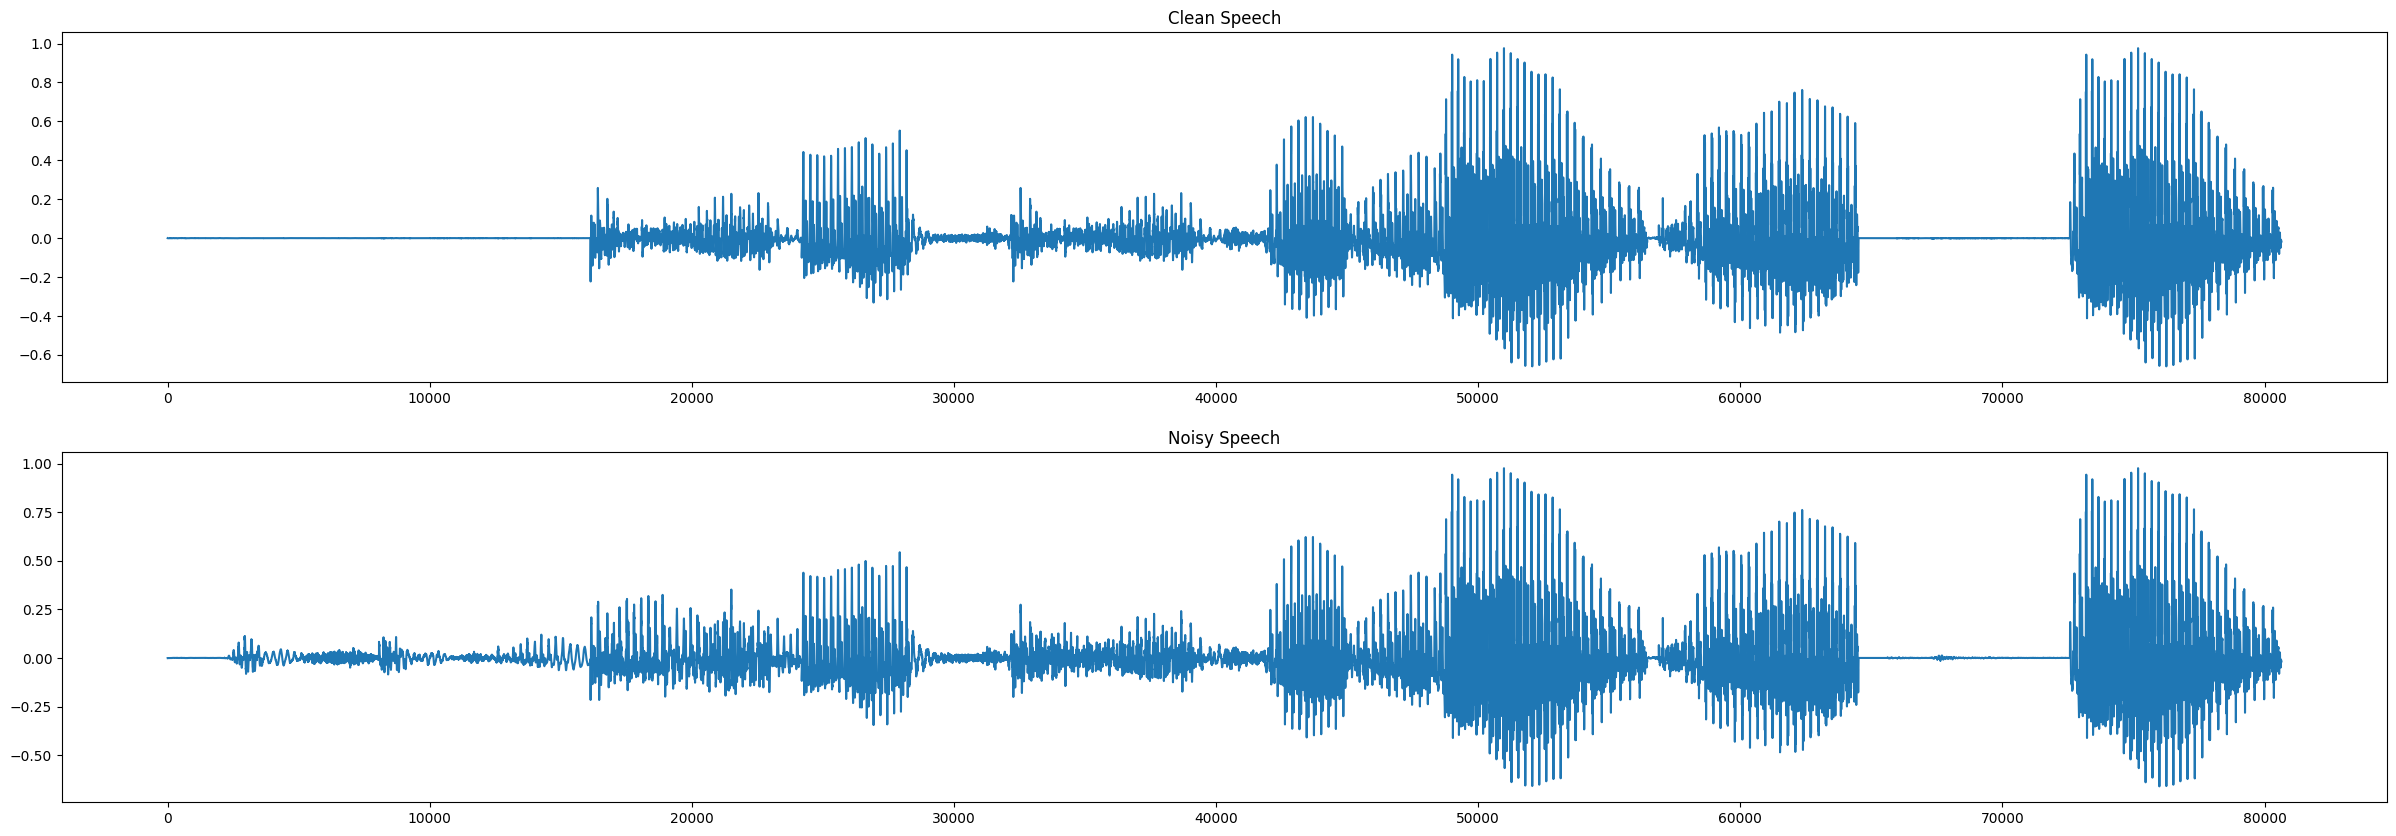

In [ ]:
# visualize the signals
plt.figure(figsize=(30,10))
plt.subplot(211)
plt.title("Clean Speech")
plt.plot(samples_clean)

plt.subplot(212)
plt.title("Noisy Speech")
plt.plot(samples_noisy_clean)

plt.show()

In [ ]:
# save and play clean voice
clean_nb_samples = prod_voice.shape[0]

# save all frames in one file
clean_long = prod_voice.reshape(1, 10 * frame_length)*10

# librosa.output.write_wav(dir_save_prediction + audio_output_prediction, denoise_long[0, :], 1000)
sf.write("clean_long.wav", clean_long[0,:], 8000, 'PCM_24')

In [ ]:
Audio('clean_long.wav')

In [ ]:
# saving and playing noisy voice
noise_nb_samples = prod_noisy_voice.shape[0]

# save all frames in one file
noise_long = prod_noisy_voice.reshape(1, 10 * frame_length)*10

# librosa.output.write_wav(dir_save_prediction + audio_output_prediction, denoise_long[0, :], 1000)
sf.write("noise_long.wav", noise_long[0,:], 8000, 'PCM_24')

In [ ]:
Audio('noise_long.wav')

In [ ]:
# convert the np matrix into a spectrogram
def audio_to_magnitude_db_and_phase(n_fft, hop_length_fft, audio):
  """This function takes an audio and converts it into a spectrogram,
  it returns the magnitude in dB and the phase"""

  stftaudio = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length_fft)
  stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)

  stftaudio_magnitude_db = librosa.amplitude_to_db(stftaudio_magnitude, ref=np.max)

  return stftaudio_magnitude_db, stftaudio_phase

In [ ]:
def numpy_audio_to_matrix_spectrogram(numpy_audio, dim_square_spec, n_fft, hop_length_fft):
  """This function takes as input a numpy audio of size (nb_frame, frame_length), and return
  a numpy containing the matrix spectrogram for amplitude in dB and phase. It will have the
  (nb_frame, dim_square_spec, dim_square_spec) shape"""

  # we extract the magnitude vectors from the 256-point STFT vectors and
  # take the first 129-point by removing the symmetric half

  nb_audio = numpy_audio.shape[0]
  # dim_square_spec = 256/2 # what is the point of this??
  m_mag_db = np.zeros((nb_audio, dim_square_spec, dim_square_spec))
  m_phase = np.zeros((nb_audio, dim_square_spec, dim_square_spec), dtype=complex)

  for i in range(nb_audio):
    m_mag_db[i, :, :], m_phase[i, :, :] = audio_to_magnitude_db_and_phase(
        n_fft, hop_length_fft, numpy_audio[i])

  return m_mag_db, m_phase

In [ ]:
def audio_files_to_numpy(audio_dir, list_audio_files, target_sample_rate, frame_length, hop_length_frame, min_duration):
    """This function take audio files of a directory and merge them
    in a numpy matrix of size (nb_frame,frame_length) for a sliding window of size hop_length_frame"""

    list_sound_array = []
    original_sample_rates = []

    count = 0
    for file in list_audio_files:
    # open the audio file
      try:
        y, sr = librosa.load(os.path.join(audio_dir, file), sr=None) # Load with original sample rate
        original_sample_rates.append(sr)
        # get duration of audio file
        total_duration = librosa.get_duration(y=y, sr=sr)
      except ZeroDivisionError:
        count += 1
        continue # Skip to the next file if there's an error

      # check if the duration is at least the minimum duration
      if (total_duration >= min_duration):
          # Resample to the target sample rate
          y_resampled = librosa.resample(y=y, orig_sr=sr, target_sr=target_sample_rate)
          list_sound_array.append(audio_to_audio_frame_stack(
              y_resampled, frame_length, hop_length_frame))
      else:
          print(
              f"The following file {os.path.join(audio_dir,file)} is below the min duration")

    print("Resampled all files from:"+str(audio_dir)+" to the rate of: "+str(target_sample_rate)+" Hz")

    return np.vstack(list_sound_array), original_sample_rates


In [ ]:
def create_data(noise_dir, voice_dir, path_save_spectrogram, frame_length, hop_length_frame, hop_length_frame_noise, nb_samples, n_fft, hop_length_fft, min_duration):
    """This function will randomly blend some clean voices from voice_dir with some noises from noise_dir
    and save the spectrograms of noisy voice, noise and clean voices to disk as well as complex phase,
    time series and sounds. This aims at preparing datasets for denoising training. It takes as inputs
    parameters defined in args module."""

    list_noise_files = os.listdir(noise_dir)
    list_voice_files = os.listdir(voice_dir)

    def remove_ds_store(lst):
        ###remove mac specific file if present
        if '.DS_Store' in lst:
            lst.remove('.DS_Store')

        return lst

    list_noise_files = remove_ds_store(list_noise_files)
    list_voice_files = remove_ds_store(list_voice_files)

    # Extracting noise and voice from folder and convert to numpy and get original sample rates
    noise, noise_srs = audio_files_to_numpy(noise_dir, list_noise_files, sample_rate, # Initial target sample rate for loading
                                     frame_length, hop_length_frame_noise, min_duration)

    voice, voice_srs = audio_files_to_numpy(voice_dir, list_voice_files, sample_rate, # Initial target sample rate for loading
                                     frame_length, hop_length_frame, min_duration)

    # Determine the lowest original sample rate
    all_srs = noise_srs + voice_srs
    min_original_sr = min(all_srs)
    # The highest possible sample rate without aliasing is min_original_sr
    target_sample_rate_for_processing = min_original_sr

    # Re-load and resample all audio to the determined target_sample_rate_for_processing
    noise, _ = audio_files_to_numpy(noise_dir, list_noise_files, target_sample_rate_for_processing,
                                     frame_length, hop_length_frame_noise, min_duration)

    voice, _ = audio_files_to_numpy(voice_dir, list_voice_files, target_sample_rate_for_processing,
                                     frame_length, hop_length_frame, min_duration)


    # Blend some clean voices with random selected noises (and a random level of noise)
    prod_voice = np.zeros((nb_samples, frame_length))
    prod_noise = np.zeros((nb_samples, frame_length))
    prod_noisy_voice = np.zeros((nb_samples, frame_length))
    voice_filenames = []
    noise_filenames = []

    for i in range(nb_samples):
        id_voice = np.random.randint(0, voice.shape[0])
        id_noise = np.random.randint(0, noise.shape[0])
        level_noise = np.random.uniform(0.2, 0.8)
        prod_voice[i, :] = voice[id_voice, :]
        prod_noise[i, :] = level_noise * noise[id_noise, :]
        prod_noisy_voice[i, :] = prod_voice[i, :] + prod_noise[i, :]
        voice_filenames.append(list_voice_files[id_voice % len(list_voice_files)])
        noise_filenames.append(list_noise_files[id_noise % len(list_noise_files)])


    # Squared spectrogram dimensions
    # Recalculate dim_square_spec based on the new target_sample_rate_for_processing if necessary.
    # Assuming n_fft and hop_length_fft are appropriate for the new sample rate
    dim_square_spec = int(n_fft / 2) + 1 # This should be fine if n_fft is chosen appropriately

    # Create Amplitude and phase of the sounds
    m_amp_db_voice,  m_pha_voice = numpy_audio_to_matrix_spectrogram(
            prod_voice, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noise,  m_pha_noise = numpy_audio_to_matrix_spectrogram(
            prod_noise, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noisy_voice,  m_pha_noisy_voice = numpy_audio_to_matrix_spectrogram(
            prod_noisy_voice, dim_square_spec, n_fft, hop_length_fft)

    np.save('/content/spectrogram/voice_amp_db.npy', m_amp_db_voice)
    np.save('/content/spectrogram/noise_amp_db.npy', m_amp_db_noise)
    np.save('/content/spectrogram/noisy_voice_amp_db', m_amp_db_noisy_voice)

    return m_amp_db_noisy_voice, m_amp_db_voice, voice_filenames, noise_filenames, target_sample_rate_for_processing

In [ ]:
# create a folder to save the audio spectrograms
!mkdir spectrogram

In [ ]:
noisy_voice_amp_db, voice_amp_db, voice_filenames, noise_filenames, determined_sample_rate = create_data(noise_dir=noise_dir,voice_dir=voice_dir,
            path_save_spectrogram=path_save_spectrogram,
            frame_length=frame_length,hop_length_frame=hop_length_frame,hop_length_frame_noise=hop_length_frame_noise,min_duration=min_duration,
            nb_samples=nb_samples,n_fft=n_fft,hop_length_fft=hop_length_fft)

Resampled all files from:/content/noise/ to the rate of: 8000 Hz
The following file /content/clean_speech/common_voice_en_31941211.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_38384936.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_41697518.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_38449426.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_41697488.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_41697517.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_38421257.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_40260250.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_38420884.mp3 is below the min duration
The following file /content/clean_speech/common_voice_en_38421233.mp3 i

In [ ]:
noisy_voice_amp_db = np.load('/content/spectrogram/noisy_voice_amp_db.npy')
print(np.shape(noisy_voice_amp_db))

(500, 128, 128)


In [ ]:
# Unet network
def unet(input_size = (128,128,1)):
    # size filter input
    size_filter_in = 16

    # normal initialization of weights
    kernel_init = 'he_normal'

    # apply leaky relu after the conv layer
    activation_layer = None
    inputs = Input(input_size)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(inputs)
    conv1 = LeakyReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv1)
    conv1 = LeakyReLU()(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(pool1)
    conv2 = LeakyReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv2)
    conv2 = LeakyReLU()(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(pool2)
    conv3 = LeakyReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv3)
    conv3 = LeakyReLU()(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(pool3)
    conv4 = LeakyReLU()(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv4)
    conv4 = LeakyReLU()(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(pool4)
    conv5 = LeakyReLU()(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv5)
    conv5 = LeakyReLU()(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(UpSampling2D(size = (2,2))(drop5))
    up6 = LeakyReLU()(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(merge6)
    conv6 = LeakyReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv6)
    conv6 = LeakyReLU()(conv6)
    conv6 = BatchNormalization()(conv6)
    up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(UpSampling2D(size = (2,2))(conv6))
    up7 = LeakyReLU()(up7)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(merge7)
    conv7 = LeakyReLU()(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv7)
    conv7 = LeakyReLU()(conv7)
    conv7 = BatchNormalization()(conv7)
    up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(UpSampling2D(size = (2,2))(conv7))
    up8 = LeakyReLU()(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(merge8)
    conv8 = LeakyReLU()(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv8)
    conv8 = LeakyReLU()(conv8)
    conv8 = BatchNormalization()(conv8)

    up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(UpSampling2D(size = (2,2))(conv8))
    up9 = LeakyReLU()(up9)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(merge9)
    conv9 = LeakyReLU()(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init, kernel_regularizer=l2(1e-4))(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = BatchNormalization()(conv9)
    conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

    model = Model(inputs,conv10)

    # Define the learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Increased learning rate from the default 0.001
    model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])
    # model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = ['mae'])
    # model.summary()

    return model

In [ ]:
### Then, use the cleaned data and installed segmentation package to train the model
def scaled_in(matrix_spec):
  """global scaling applied to noisy voice spectrograms (scaled between -1 and 1)"""
  matrix_spec = (matrix_spec + 46)/50
  return matrix_spec

def scaled_ou(matrix_spec):
  """global scaling applied to noise models spectrograms (scaled between 0 and 1)"""
  matrix_spec = (matrix_spec - 6)/82
  return matrix_spec

In [ ]:
noisy_voice = np.load("/content/spectrogram/noisy_voice_amp_db.npy")
voice = np.load("/content/spectrogram/voice_amp_db.npy")
noise = noisy_voice

In [ ]:
# shape of noisy voice data
print(noisy_voice.shape)
# shape of noise data
print(noise.shape)

(500, 128, 128)
(500, 128, 128)


In [ ]:
# Input
noisy_voice = noisy_voice[:,:,:]
noisy_voice = noisy_voice.reshape(noisy_voice.shape[0],noisy_voice.shape[1],noisy_voice.shape[2],1)
# Output
noise = noise[:,:,:]
noise = noise.reshape(noise.shape[0],noise.shape[1],noise.shape[2],1)

In [ ]:
# shapes after reshaping
print(noisy_voice.shape)
print(noise.shape)

(500, 128, 128, 1)
(500, 128, 128, 1)


In [ ]:
def training_unet(path_save_spectrogram, weights_path, epochs, batch_size, voice_filenames, noise_filenames):
    """ This function will read noisy voice and clean voice spectrograms created by data_creation mode,
    and train a Unet model on this dataset for epochs and batch_size specified. It saves best models to disk regularly.
    It now also saves the original filenames used for the training and testing sets."""

    #load noisy voice & clean voice spectrograms created by data_creation mode
    X_in = np.load(path_save_spectrogram +'noisy_voice_amp_db'+".npy")
    X_ou = np.load(path_save_spectrogram +'voice_amp_db'+".npy")
    #Model of noise to predict
    X_ou = X_in - X_ou

    #Check distribution
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))

    #to scale between -1 and 1
    X_in = scaled_in(X_in)
    X_ou = scaled_ou(X_ou)

    #Check shape of spectrograms
    print(X_in.shape)
    print(X_ou.shape)
    #Check new distribution
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))

    #Reshape for training
    X_in = X_in[:,:,:]
    X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)
    X_ou = X_ou[:,:,:]
    X_ou = X_ou.reshape(X_ou.shape[0],X_ou.shape[1],X_ou.shape[2],1)

    split = 0.20 # model does not overfit, trying 80-20 split
    X_train, X_test, y_train, y_test, voice_filenames_train, voice_filenames_test, noise_filenames_train, noise_filenames_test = train_test_split(
        X_in, X_ou, voice_filenames, noise_filenames, test_size=split, random_state=42)

    generator_nn=unet()

    # check learning rate
    print("Learning rate: {}".format(backend.get_value(generator_nn.optimizer.learning_rate.numpy())))

    #Save best models to disk during training
    checkpoint = ModelCheckpoint(weights_path+'/model_unet_best.keras', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') # was .h5 file, changed to .keras to remove warnings
    generator_nn.summary()

    #Training
    history = generator_nn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[checkpoint], verbose=1, validation_data=(X_test, y_test))
    model_in_json = generator_nn.to_json()

    # save train-test split and relevant data
    split_info = {}
    split_info['test_ratio'] = split
    split_info['train_indices_x'] = list(range(len(X_train)))
    split_info['test_indices_x'] = list(range(len(X_train), len(X_train) + len(X_test)))
    split_info['train_indices_y'] = list(range(len(y_train)))
    split_info['test_indices_y'] = list(range(len(y_train), len(y_train) + len(y_test)))
    split_info['voice_filenames_train'] = voice_filenames_train
    split_info['voice_filenames_test'] = voice_filenames_test
    split_info['noise_filenames_train'] = noise_filenames_train
    split_info['noise_filenames_test'] = noise_filenames_test


    # Save to a JSON file
    with open("split_info.json", "w") as f:
      json.dump(split_info, f) # Use json.dump to write the dictionary as a JSON string

    print("Split information saved to 'split_info.json'")

    # Convert to DataFrame (if applicable)
    train_data = pandas.DataFrame({"data": X_train.flatten(), "labels": y_train.flatten()})
    test_data = pandas.DataFrame({"data": X_test.flatten(), "labels": y_test.flatten()})

    # Save to CSV
    train_data.to_csv("train_data.csv", index=False)
    test_data.to_csv("test_data.csv", index=False)

    print("Train and test datasets saved as CSV files.")

    #Saving Model
    with open(weights_path+'model_unet.json','w') as json_file:
      json_file.write(model_in_json)

    #Plot training and validation loss (log scale)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.yscale('log')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
!mkdir weights

model not found, training...
DescribeResult(nobs=np.int64(8192000), minmax=(array([-80.]), array([0.])), mean=array([-53.63041771]), variance=array([393.14265883]), skewness=array([0.30483684]), kurtosis=array([-0.87292219]))
DescribeResult(nobs=np.int64(8192000), minmax=(array([-80.]), array([80.])), mean=array([5.33546998]), variance=array([318.54993478]), skewness=array([-0.24342975]), kurtosis=array([2.43524038]))
(500, 128, 128)
(500, 128, 128)
DescribeResult(nobs=np.int64(8192000), minmax=(array([-0.68]), array([0.92])), mean=array([-0.15260835]), variance=array([0.15725706]), skewness=array([0.30483684]), kurtosis=array([-0.87292219]))
DescribeResult(nobs=np.int64(8192000), minmax=(array([-1.04878049]), array([0.90243902])), mean=array([-0.00810402]), variance=array([0.04737506]), skewness=array([-0.24342975]), kurtosis=array([2.43524038]))
Learning rate: 0.0010000000474974513


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │         64 │ leaky_re_lu[0][0] │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │         64 │ leaky_re_lu_1[0]… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ leaky_re_lu_2[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ leaky_re_lu_3[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 32, 32,    │          0 │ conv2d_4[0][0]  

 Total params: 1,946,989 (7.43 MB)

 Trainable params: 1,944,041 (7.42 MB)

 Non-trainable params: 2,948 (11.52 KB)

Epoch 1/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - loss: 0.4220 - mae: 0.2254
Epoch 1: val_loss improved from inf to 0.94222, saving model to ./weights/model_unet_best.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 432ms/step - loss: 0.4208 - mae: 0.2243 - val_loss: 0.9422 - val_mae: 0.7106
Epoch 2/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - loss: 0.2829 - mae: 0.1412
Epoch 2: val_loss improved from 0.94222 to 0.23654, saving model to ./weights/model_unet_best.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - loss: 0.2824 - mae: 0.1412 - val_loss: 0.2365 - val_mae: 0.1768
Epoch 3/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - loss: 0.2024 - mae: 0.1326
Epoch 3: val_loss improved from 0.23654 to 0.18848, saving model to ./weights/model_unet_best.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 367ms/step - loss: 0.2022 - mae: 0.1327 - val_loss: 0.1885 - val_mae: 0.1741
Epoch 4/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 0.1612 - mae: 0.1377
Epoch 4: val_loss improved from 0.18848 to 0.15789, savi

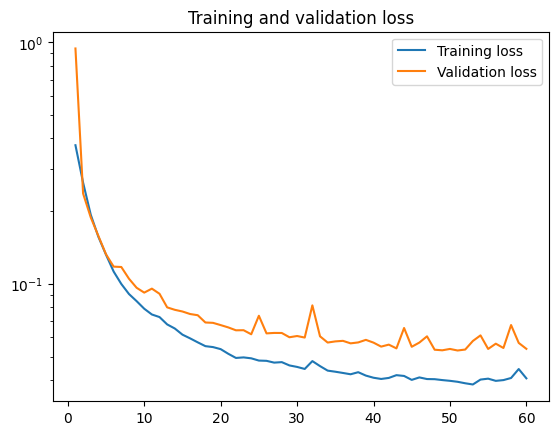

In [ ]:
# if possible, load the model. Otherwise, train (for some reason using the weights path doesn't work... use the top directory and it does?)
if os.path.exists(model_path):
  print("model found! loading...")
  generator_nn = tf.keras.models.load_model(model_path)
  generator_nn.summary()
else:
  print("model not found, training...")
  # Pass the determined sample rate to the training function if needed for model architecture or data handling
  # Assuming the model architecture (U-Net) is independent of sample rate for a fixed spectrogram size
  training_unet('/content/spectrogram/', './weights', epochs=  60,batch_size=10, voice_filenames=voice_filenames, noise_filenames=noise_filenames)

In [ ]:
def magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, stftaudio_magnitude_db, stftaudio_phase):
    """This functions reverts a spectrogram to an audio"""

    stftaudio_magnitude_rev = librosa.db_to_amplitude(stftaudio_magnitude_db, ref=1.0)

    # taking magnitude and phase of audio
    audio_reverse_stft = stftaudio_magnitude_rev * stftaudio_phase
    audio_reconstruct = librosa.core.istft(audio_reverse_stft, hop_length=hop_length_fft, length=frame_length)

    return audio_reconstruct

def matrix_spectrogram_to_numpy_audio(m_mag_db, m_phase, frame_length, hop_length_fft)  :
    """This functions reverts the matrix spectrograms to numpy audio"""

    list_audio = []
    nb_spec = m_mag_db.shape[0]

    for i in range(nb_spec):
        audio_reconstruct = magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, m_mag_db[i], m_phase[i])
        list_audio.append(audio_reconstruct)

    return np.vstack(list_audio)

def inv_scaled_ou(matrix_spec):
    "inverse global scaling apply to noise models spectrograms"

    matrix_spec = matrix_spec * 82 + 6

    return matrix_spec

In [ ]:
import os
import numpy as np
import librosa
import soundfile as sf

def prediction(audio_dir_prediction, list_prediction_files, frame_length, hop_length_frame):

    all_denoised = []
    original_srs = []

    # load model
    model = tf.keras.models.load_model('/content/weights/model_unet_best.keras')
    print("Loaded model from disk")

    for file in list_prediction_files:
        y, sr = librosa.load(os.path.join(audio_dir_prediction, file), sr=None)
        original_srs.append(sr)

        # Resample to lowest SR
        target_sr = min(original_srs)
        if sr != target_sr:
            y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)

        frames = audio_to_audio_frame_stack(y, frame_length, hop_length_frame)

        # Dimensions of squared spectrogram
        dim_square_spec = int(n_fft / 2) + 1
        print(dim_square_spec)

        # Create Amplitude and phase of the sounds
        m_amp_db_audio,  m_pha_audio = numpy_audio_to_matrix_spectrogram(
            frames, dim_square_spec, n_fft, hop_length_fft)

        # Use global scaling to have distribution -1/1
        X_in = scaled_in(m_amp_db_audio)

        # Reshape for prediction
        X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)

        # Prediction using loaded network
        X_pred = model.predict(X_in)

        # Rescale back the noise model
        inv_sca_X_pred = inv_scaled_ou(X_pred)

        # Remove noise model from noisy speech
        X_denoise = m_amp_db_audio - inv_sca_X_pred[:,:,:,0]

        # Reconstruct audio from denoised spectrogram and phase
        print(X_denoise.shape)
        print(m_pha_audio.shape)
        print(frame_length)
        print(hop_length_fft)
        audio_denoise_recons = matrix_spectrogram_to_numpy_audio(X_denoise, m_pha_audio, frame_length, hop_length_fft)

        # Number of frames
        nb_samples = audio_denoise_recons.shape[0]

        #Save all frames in one file
        denoise_long = audio_denoise_recons.reshape(1, nb_samples * frame_length)*10

        # Flatten and append
        denoised_audio = denoise_long.flatten()
        all_denoised.append(denoised_audio)

    # Concatenate all denoised audio into one array
    final_audio = np.concatenate(all_denoised).astype(np.float32)
    final_audio = np.nan_to_num(final_audio)

    return final_audio, target_sr

In [ ]:
### Method to calculate the SNR
def snr_db(clean, test):
  """Compute SNR in dB."""
  noise = clean - test
  return 10 * np.log10(np.mean(clean ** 2) / np.mean(noise ** 2))

In [ ]:
from clarity.evaluator import haspi

local_audio_path = '/content/700-122866-0002.flac' # Change this to your local file path
output_noisy_audio_path = '/content/noisy_700-122866-0002_9_25.wav'
output_denoised_audio_path = '/content/clean_700-122866-0002_9_25.wav'

print("\n--- Creating Noisy Audio ---")

# Load the local audio file with original sampling rate to determine minimum SR
y_local, sr_local = librosa.load(local_audio_path, sr=None)

# Get a list of noise files
list_noise_files = os.listdir(noise_dir)

# Remove .DS_Store if present
if '.DS_Store' in list_noise_files:
    list_noise_files.remove('.DS_Store')

# Load one noise file with original sample rate to determine minimum SR
noise_random_audio_file = np.random.choice(list_noise_files)
noise_path = os.path.join(noise_dir, noise_random_audio_file)
y_noise_orig_sr, sr_noise_orig = librosa.load(noise_path, sr=None)

# Determine the minimum original sample rate between the local audio and the selected noise file
min_original_sr_local_noise = min(sr_local, sr_noise_orig)

# The highest possible sample rate without aliasing is min_original_sr_local_noise
target_sample_rate_for_prediction = min_original_sr_local_noise

# Resample local audio to the determined target sample rate for prediction
y_local_resampled = librosa.resample(y=y_local, orig_sr=sr_local, target_sr=target_sample_rate_for_prediction)

# Resample noise audio to the determined target sample rate for prediction
y_noise_resampled = librosa.resample(y=y_noise_orig_sr, orig_sr=sr_noise_orig, target_sr=target_sample_rate_for_prediction)

# Ensure both audio files are long enough for at least one frame at the target sample rate
# Recalculate frame_length based on the new target sample rate if necessary.
# Assuming frame_length is defined in samples, it should remain constant.
# However, if frame_length is intended to represent a fixed duration, it needs recalculation.
# Let's assume frame_length is in samples and remains constant.
if len(y_local_resampled) < frame_length or len(y_noise_resampled) < frame_length:
    print("Audio file is too short for framing at the determined target sample rate. Please use a longer audio file.")
else:
    # Convert audio to numpy matrix frames
    local_frames = audio_to_audio_frame_stack(y_local_resampled, frame_length, hop_length_frame)
    noise_frames = audio_to_audio_frame_stack(y_noise_resampled, frame_length, hop_length_frame)

    # Blend noise randomly - use the local audio frames and blend with noise frames
    nb_blend_samples = local_frames.shape[0] # Blend as many frames as the local audio has

    if noise_frames.shape[0] < nb_blend_samples:
        print(f"Warning: Not enough noise frames ({noise_frames.shape[0]}) to blend with all local audio frames ({nb_blend_samples}). Some noise frames will be reused.")
        # Pad noise frames by repeating if necessary
        repeat_factor = int(np.ceil(nb_blend_samples / noise_frames.shape[0]))
        noise_frames_padded = np.tile(noise_frames, (repeat_factor, 1))
        noise_frames = noise_frames_padded[:nb_blend_samples]

    # Ensure the dimensions match before blending
    min_frames = min(local_frames.shape[0], noise_frames.shape[0])
    local_frames_cropped = local_frames[:min_frames, :]
    noise_frames_cropped = noise_frames[:min_frames, :]

    prod_voice, prod_noise, prod_noisy_voice = blend_noise_randomly(
        voice=local_frames_cropped,
        noise=noise_frames_cropped,
        nb_samples=min_frames,
        frame_length=frame_length
    )

    # Concatenate the noisy frames back into a single audio signal
    noisy_audio_blended = prod_noisy_voice.flatten()

    # Save the blended noisy audio to a temporary file
    sf.write(output_noisy_audio_path, noisy_audio_blended, target_sample_rate_for_prediction, 'PCM_24') # Use target_sample_rate_for_prediction

    print(f"Created noisy audio at: {output_noisy_audio_path}")
    print(f"Sample rate of created noisy audio: {target_sample_rate_for_prediction} Hz")

    print("\n--- Metrics for Noisy Audio ---")

    # Reference = clean waveform (resampled)
    ref_signal = y_local_resampled

    # Processed = noisy waveform
    proc_noisy = noisy_audio_blended

    # Truncate to same length
    min_len_noisy = min(len(ref_signal), len(proc_noisy))
    ref_trunc = ref_signal[:min_len_noisy]
    noisy_trunc = proc_noisy[:min_len_noisy]

    # HASPI score: inputs are (clear input ref signal, input sr, processed sample w/noise or gain, processed sr, and lvl of hearing loss/audiogram)
    # comparing noisy --> original
    haspi_noisy, _ = haspi.haspi_v2(
        ref_trunc, target_sample_rate_for_prediction,
        noisy_trunc, target_sample_rate_for_prediction,
        audiogram_obj
    )
    snr_noisy = snr_db(ref_trunc, noisy_trunc)

    print(f"HASPI (noisy audio): {haspi_noisy}")
    print(f"SNR (noisy audio): {snr_noisy:.4f} dB")

    print("\n--- Denoising Audio ---")

    # Run prediction on the blended noisy audio
    cleaned_audio, clean_audio_sr = prediction(
        audio_dir_prediction='/content',
        list_prediction_files=[local_audio_path],
        frame_length=frame_length,
        hop_length_frame=hop_length_frame
    )

    # Ensure cleaned_audio is a valid NumPy array
    cleaned_audio = np.asarray(cleaned_audio, dtype=np.float32)
    cleaned_audio = np.nan_to_num(cleaned_audio)

    # Ensure sample rate is valid
    assert isinstance(clean_audio_sr, int) and clean_audio_sr > 0, "Invalid sample rate"

    # Ensure correct shape
    if cleaned_audio.ndim == 2 and cleaned_audio.shape[0] < cleaned_audio.shape[1]:
        cleaned_audio = cleaned_audio.T

    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_denoised_audio_path), exist_ok=True)

    print(f"Denoised audio saved as: {output_denoised_audio_path}")
    # Save the denoised audio to a temporary file
    try:
        sf.write(output_denoised_audio_path, cleaned_audio, clean_audio_sr, 'PCM_24')
    except Exception as e:
        print(f"Error saving audio: {e}")
        print(f"Audio dtype: {cleaned_audio.dtype}, shape: {cleaned_audio.shape}")
        print(f"Sample rate: {clean_audio_sr}")

    print("\n--- Metrics for Denoised Audio ---")

    # Processed = denoised waveform
    proc_denoised = cleaned_audio

    # Truncate to same length
    min_len_denoised = min(len(ref_signal), len(proc_denoised))
    ref_trunc = ref_signal[:min_len_denoised]
    denoised_trunc = proc_denoised[:min_len_denoised]

    # Metrics for denoised
    haspi_denoised, _ = haspi.haspi_v2(
        ref_trunc, target_sample_rate_for_prediction,
        denoised_trunc, target_sample_rate_for_prediction,
        audiogram_obj
    )
    snr_denoised = snr_db(ref_trunc, denoised_trunc)

    print(f"HASPI (denoised audio): {haspi_denoised}")
    print(f"SNR (denoised audio): {snr_denoised:.4f} dB")


--- Creating Noisy Audio ---
Created noisy audio at: /content/noisy_700-122866-0002_9_25.wav
Sample rate of created noisy audio: 16000 Hz

--- Metrics for Noisy Audio ---
HASPI (noisy audio): 0.999584512865594
SNR (noisy audio): -3.2201 dB

--- Denoising Audio ---
Loaded model from disk
128
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
(7, 128, 128)
(7, 128, 128)
8064
63
Denoised audio saved as: /content/clean_700-122866-0002_9_25.wav

--- Metrics for Denoised Audio ---
HASPI (denoised audio): 0.9999834825301125
SNR (denoised audio): 3.0097 dB


In [ ]:
# Converting a tf.Keras model to a TensorFlow Lite model.
# Load the saved Keras model
loaded_model = tf.keras.models.load_model('/content/weights/model_unet_best.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model
with open("model_unet_best.tflite", "wb") as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpxrr731nj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None)
Captures:
  134084289493712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289492368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289493520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289479504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289491600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289494672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289492176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289479312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289493904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134084289478736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13408